In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split 

In [2]:
dataset=pd.read_csv('SVMdataset.csv')
print (dataset.head())

         x1        x2  y
0  0.107143  0.603070  1
1  0.093318  0.649854  1
2  0.097926  0.705409  1
3  0.155530  0.784357  1
4  0.210829  0.866228  1


In [3]:
X1=dataset['x1']
X2=dataset['x2']
X=np.array([X1,X2])
Y=dataset['y']

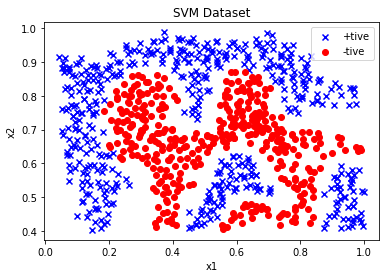

In [4]:
x1p=X1[Y==1]
x2p=X2[Y==1]
plot.scatter(x1p,x2p,marker='x',c='blue',label="+tive")
x1n=X1[Y==0]
x2n=X2[Y==0]
plot.scatter(x1n,x2n,marker='o',c='red',label="-tive")
plot.title("SVM Dataset")
plot.xlabel("x1")
plot.ylabel("x2")
plot.legend(loc="upper right")
plot.show()

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T, test_size=0.4)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_test, Y_test, test_size=0.5)

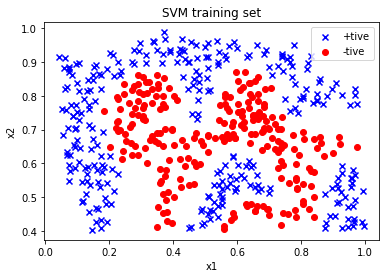

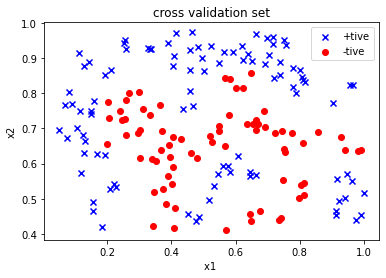

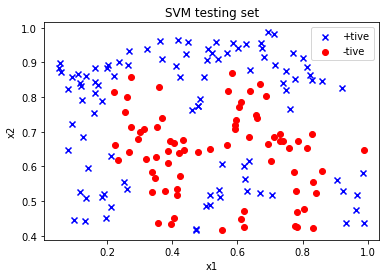

In [6]:
##############################################################
X1t=X_train.T[0]
X2t=X_train.T[1]
Yt=Y_train.T
x1tp=X1t[Yt==1]
x2tp=X2t[Yt==1]
plot.scatter(x1tp,x2tp,marker='x',c='blue',label="+tive")
x1tn=X1t[Yt==0]
x2tn=X2t[Yt==0]
plot.scatter(x1tn,x2tn,marker='o',c='red',label="-tive")
plot.title("SVM training set")
plot.xlabel("x1")
plot.ylabel("x2")
plot.legend(loc="upper right")
plot.show()
######################################################################
X1v=X_valid.T[0]
X2v=X_valid.T[1]
Yv=Y_valid.T
x1vp=X1v[Yv==1]
x2vp=X2v[Yv==1]
plot.scatter(x1vp,x2vp,marker='x',c='blue',label="+tive")
x1vn=X1v[Yv==0]
x2vn=X2v[Yv==0]
plot.scatter(x1vn,x2vn,marker='o',c='red',label="-tive")
plot.title("cross validation set")
plot.xlabel("x1 ")
plot.ylabel("x2")
plot.legend(loc="upper right")
plot.show()
######################################################################
X1t=X_test.T[0]
X2t=X_test.T[1]
Yt=Y_test.T
x1tp=X1t[Yt==1]
x2tp=X2t[Yt==1]
plot.scatter(x1tp,x2tp,marker='x',c='blue',label="+tive")
x1tn=X1t[Yt==0]
x2tn=X2t[Yt==0]
plot.scatter(x1tn,x2tn,marker='o',c='red',label="-tive")
plot.title("SVM testing set")
plot.xlabel("x1")
plot.ylabel("x2")
plot.legend(loc="upper right")
plot.show()

In [7]:
from sklearn import svm
from sklearn import metrics
def select_gamma(arr_gamma):
    old_f1=0
    j=-1
    for i in range(0,len(arr_gamma)):
        gam=arr_gamma[i]
        clf =svm.SVC(kernel='rbf', gamma=gam)
        clf.fit(X_train,Y_train)
        y_predict=clf.predict(X_valid)
        f1=metrics.f1_score(Y_valid,y_predict)
        if(f1>=old_f1):
            j=i
            old_f1=f1
    print (j)
    return arr_gamma[j]
        

In [8]:
arr_gamma=np.array([0.05,0.07,0.1,0.15,1,10,100,1000])
gam=select_gamma(arr_gamma)
clf =svm.SVC(kernel='rbf', gamma=gam)
clf.fit(X_train,Y_train)

7


SVC(gamma=1000.0)

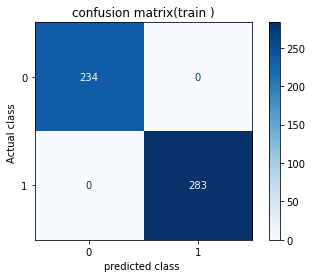

Train :
accurcy =  1.0 

recall =  1.0 

precision =  1.0 

F1 score=  1.0 

Auc Roc =  1.0 



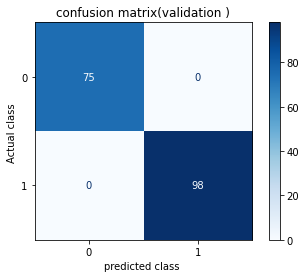

valid :
accurcy =  1.0 

recall =  1.0 

precision =  1.0 

F1 score=  1.0 

Auc Roc =  1.0 



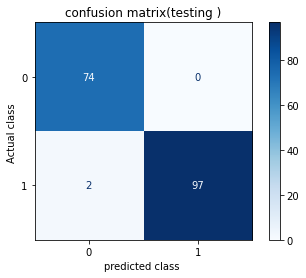

Test :
accurcy =  0.9884393063583815 

recall =  0.9797979797979798 

precision =  1.0 

F1 score=  0.989795918367347 

Auc Roc =  0.9898989898989898 



In [9]:
dis=metrics.plot_confusion_matrix(clf,X_train , Y_train ,cmap=plot.cm.Blues)
plot.title("confusion matrix(train )")
plot.xlabel("predicted class ")
plot.ylabel("Actual class ")
plot.show()
Y_predicit_train=clf.predict(X_train).T
acc=metrics.accuracy_score(Y_train ,Y_predicit_train )
recall=metrics.recall_score(Y_train,Y_predicit_train)
precision=metrics.precision_score(Y_train,Y_predicit_train)
f1=metrics.f1_score(Y_train,Y_predicit_train)
auc=metrics.roc_auc_score(Y_train,Y_predicit_train)
print ("Train :")
print ("accurcy = ",acc,"\n")
print ("recall = ",recall,"\n")
print ("precision = ",precision,"\n")
print ("F1 score= ",f1,"\n")
print ("Auc Roc = ",auc,"\n")
dis=metrics.plot_confusion_matrix(clf,X_valid , Y_valid,cmap=plot.cm.Blues)
plot.title("confusion matrix(validation )")
plot.xlabel("predicted class ")
plot.ylabel("Actual class ")
plot.show()
###########################################################################################
Y_predict=clf.predict(X_valid)
acc=metrics.accuracy_score(Y_valid,Y_predict)
recall=metrics.recall_score(Y_valid,Y_predict)
precision=metrics.precision_score(Y_valid,Y_predict)
f1=metrics.f1_score(Y_valid,Y_predict)
auc=metrics.roc_auc_score(Y_valid,Y_predict)
print ("valid :")
print ("accurcy = ",acc,"\n")
print ("recall = ",recall,"\n")
print ("precision = ",precision,"\n")
print ("F1 score= ",f1,"\n")
print ("Auc Roc = ",auc,"\n")

dis=metrics.plot_confusion_matrix(clf,X_test, Y_test,cmap=plot.cm.Blues)
plot.title("confusion matrix(testing )")
plot.xlabel("predicted class ")
plot.ylabel("Actual class ")
plot.show()
Y_predicit_test=clf.predict(X_test).T
acc=metrics.accuracy_score(Y_test,Y_predicit_test)
recall=metrics.recall_score(Y_test,Y_predicit_test)
precision=metrics.precision_score(Y_test,Y_predicit_test)
f1=metrics.f1_score(Y_test,Y_predicit_test)
auc=metrics.roc_auc_score(Y_test,Y_predicit_test)
print ("Test :")
print ("accurcy = ",acc,"\n")
print ("recall = ",recall,"\n")
print ("precision = ",precision,"\n")
print ("F1 score= ",f1,"\n")
print ("Auc Roc = ",auc,"\n")

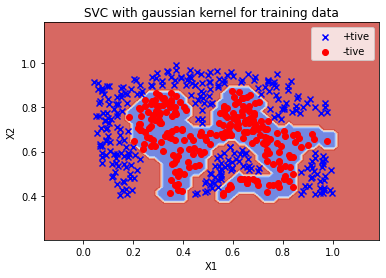

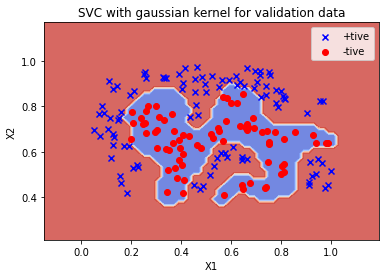

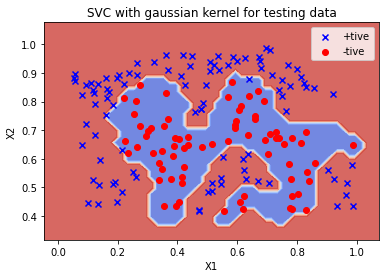

In [10]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - .2, X_train[:, 0].max() + .2
y_min, y_max = X_train[:, 1].min() - .2, X_train[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plot.contourf(xx, yy, Z, cmap=plot.cm.coolwarm, alpha=0.8)
    # Plot also the training points
X1t=X_train.T[0]
X2t=X_train.T[1]
Yt=Y_train.T
x1tp=X1t[Yt==1]
x2tp=X2t[Yt==1]
plot.scatter(x1tp,x2tp,marker='x',c='blue',label="+tive")
x1tn=X1t[Yt==0]
x2tn=X2t[Yt==0]
plot.scatter(x1tn,x2tn,marker='o',c='red',label="-tive")
plot.xlabel('X1')
plot.ylabel('X2')
plot.xlim(xx.min(), xx.max())
plot.ylim(yy.min(), yy.max())
plot.title('SVC with gaussian kernel for training data')
plot.legend(loc="upper right")
plot.show()
################################################################################
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_valid[:, 0].min() - .2, X_valid[:, 0].max() + .2
y_min, y_max = X_valid[:, 1].min() - .2, X_valid[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plot.contourf(xx, yy, Z, cmap=plot.cm.coolwarm, alpha=0.8)

    # Plot also the training points
X1v=X_valid.T[0]
X2v=X_valid.T[1]
Yv=Y_valid.T
x1vp=X1v[Yv==1]
x2vp=X2v[Yv==1]
plot.scatter(x1vp,x2vp,marker='x',c='blue',label="+tive")
x1vn=X1v[Yv==0]
x2vn=X2v[Yv==0]
plot.scatter(x1vn,x2vn,marker='o',c='red',label="-tive")
plot.xlabel('X1')
plot.ylabel('X2')
plot.xlim(xx.min(), xx.max())
plot.ylim(yy.min(), yy.max())
plot.title('SVC with gaussian kernel for validation data')
plot.legend(loc="upper right")
plot.show()
#################################################################################

h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_test[:, 0].min() - 0.1, X_test[:, 0].max() + .1
y_min, y_max = X_test[:, 1].min() - .1, X_test[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plot.contourf(xx, yy, Z, cmap=plot.cm.coolwarm, alpha=0.8)
    # Plot also the training points
X1t=X_test.T[0]
X2t=X_test.T[1]
Yt=Y_test.T
x1tp=X1t[Yt==1]
x2tp=X2t[Yt==1]
plot.scatter(x1tp,x2tp,marker='x',c='blue',label="+tive")
x1tn=X1t[Yt==0]
x2tn=X2t[Yt==0]
plot.scatter(x1tn,x2tn,marker='o',c='red',label="-tive")
plot.xlabel('X1')
plot.ylabel('X2')
plot.title('SVC with gaussian kernel for testing data')
plot.legend(loc="upper right")
plot.show()